In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score



In [2]:
df = pd.read_csv("/Users/ricardordoriguez/Desktop/Data Science Workspace/British_Airways_Job_sim/Task 2/customer_booking.csv", encoding='latin-1')

## Data Preprocessing

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
# check for null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
# unique values in sales_channel and trip_type
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

## EDA

In [7]:

# Filter to include only complete bookings
df_complete = df[df['booking_complete'] == 1]

# Aggregate the number of complete bookings by country
country_bookings = df_complete.groupby('booking_origin').size().reset_index(name='complete_bookings')

# Create the choropleth map
fig = px.choropleth(country_bookings, 
                    locations='booking_origin', 
                    locationmode='country names',
                    color='complete_bookings',
                    color_continuous_scale='Viridis',
                    title='Number of Complete Bookings by Country')

# Show the map
fig.show()


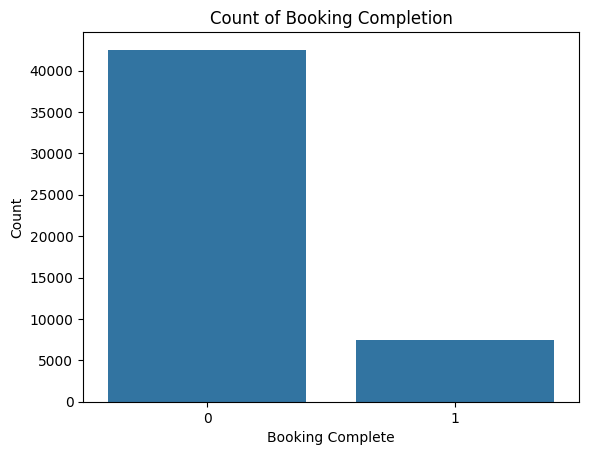

In [8]:
sns.countplot(data=df, x='booking_complete' )
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.title('Count of Booking Completion')
plt.show()


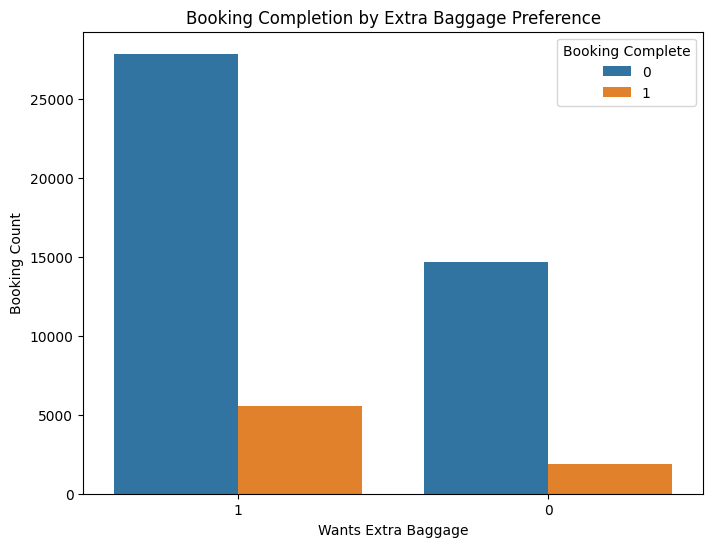

In [9]:
plt.figure(figsize=(8, 6))
X = df['wants_extra_baggage'].astype(str)
Y = df['booking_complete'].astype(str)
sns.countplot(data=df, x=X, hue=Y, dodge=True)
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Booking Count')
plt.title('Booking Completion by Extra Baggage Preference')
plt.legend(title='Booking Complete')
plt.show()


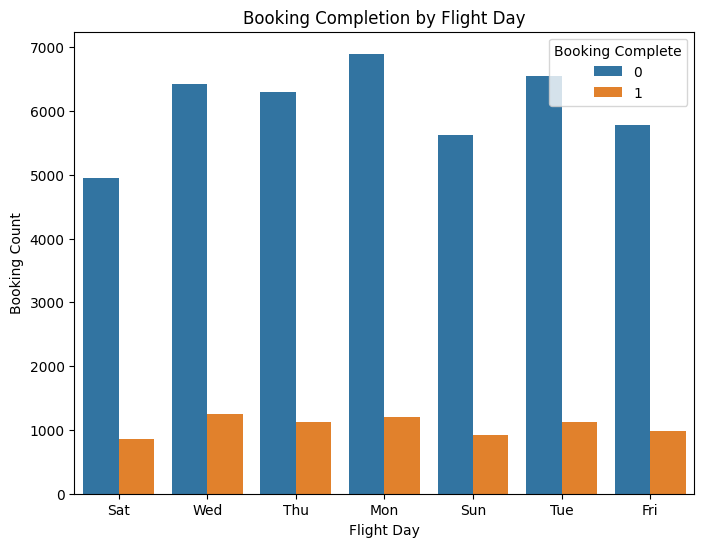

In [10]:
plt.figure(figsize=(8, 6))
X = df['flight_day'].astype(str)
Y = df['booking_complete'].astype(str)
sns.countplot(data=df, x=X, hue=Y, dodge=True)
plt.xlabel('Flight Day')
plt.ylabel('Booking Count')
plt.title('Booking Completion by Flight Day')
plt.legend(title='Booking Complete')
plt.show()

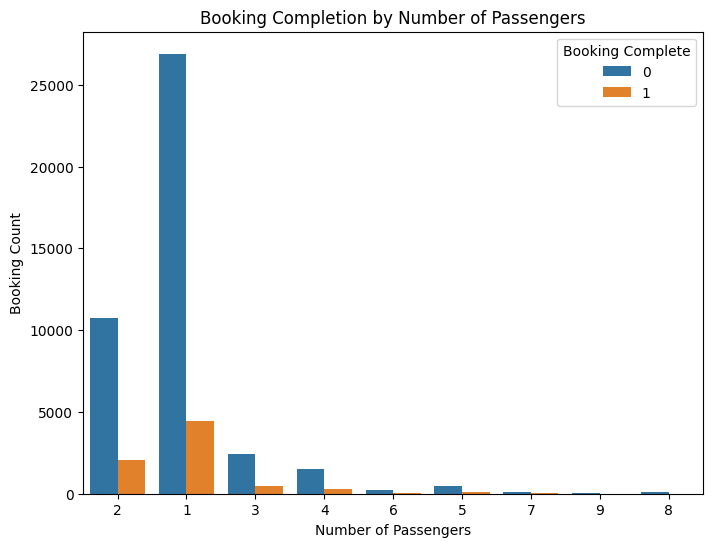

In [11]:
plt.figure(figsize=(8, 6))
X = df['num_passengers'].astype(str)
Y = df['booking_complete'].astype(str)
sns.countplot(data=df, x=X, hue=Y, dodge=True)
plt.xlabel('Number of Passengers')
plt.ylabel('Booking Count')
plt.title('Booking Completion by Number of Passengers')
plt.legend(title='Booking Complete')
plt.show()

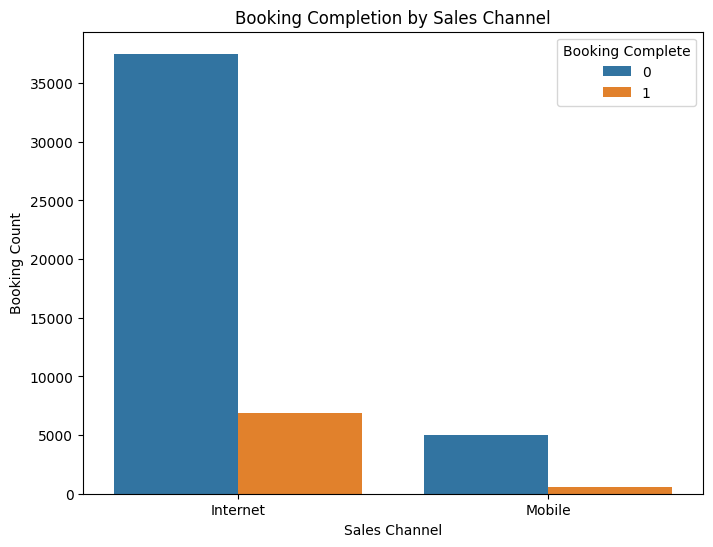

In [12]:
plt.figure(figsize=(8, 6))
X = df['sales_channel']
Y = df['booking_complete'].astype(str)
sns.countplot(data=df, x=X, hue=Y, dodge=True)
plt.xlabel('Sales Channel')
plt.ylabel('Booking Count')
plt.title('Booking Completion by Sales Channel')
plt.legend(title='Booking Complete')
plt.show()

## Model Training and Evaluation

### Random Forest Model

In [15]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df)

# Define features (X) and target variable (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

#### Evaluation Metrics:


#### Accuracy:

In [17]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8541


#### Precision

In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision))

Precision: 0.53%


#### Confusion Matrix

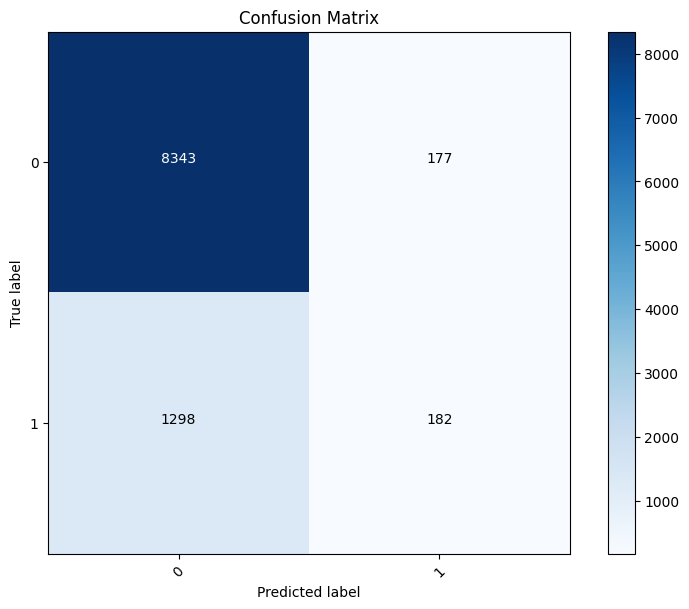

In [33]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get class labels
classes = rf_classifier.classes_

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Add ticks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Feature Importance

In [19]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get indices of features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Get names of features
feature_names = X.columns

# Print top n features
n = 5  # Number of top features to display
top_features = [feature_names[i] for i in sorted_indices[:n]]
print("Top", n, "features:")
for feature in top_features:
    print(feature)


Top 5 features:
purchase_lead
flight_hour
length_of_stay
num_passengers
flight_duration


##### Random Forest with top ten features 

In [35]:
# Define features (X) and target variable (y)
X = df[top_features]  # Use only the top ten features
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8073


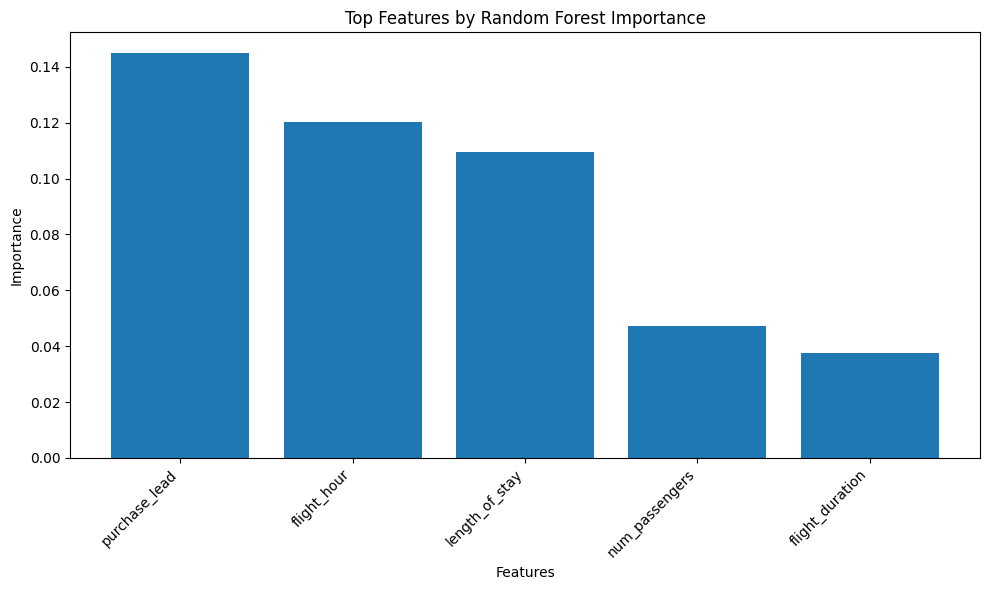

In [20]:

# Sort indices of features by importance
sorted_indices_rf = np.argsort(feature_importances)[::-1]

# Get names of top features
top_features_rf = [feature_names[i] for i in sorted_indices_rf[:n]]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features_rf)), feature_importances[sorted_indices_rf[:n]], align='center')
plt.xticks(range(len(top_features_rf)), top_features_rf, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top Features by Random Forest Importance')
plt.tight_layout()
plt.show()

### Support Vector Machine

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear') 

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.852


### K-Nearest Neighbors

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) 

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.8304
